In [1]:
#First we import the necessary libraries.
#pywt is a wavelet transformation library which I found is easier to apply than manually coding functions up.
from __future__ import print_function
import pywt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('/Users/andyliu/develop/andy/aapl_indicators_nosplit.csv')
df2 = df1.iloc[:,1:]
df3 = df2.drop(labels=['roc', 'mtm6', 'mtm12'], axis=1)
df1 = df3
df1.head()

,date,open,close,low,high,volume,bb_bbm,bb_bbh,bb_bbl,atr,macd,cci,ema,sma12,sma5,stochastic_oscillator
0,2/8/00,4.0714,4.1027,3.9755,4.1451,0,3.742555,4.258224,3.226886,0.258809,0.028209,108.782044,3.824942,3.819608,3.85050,75.940406
1,2/9/00,4.0804,4.0224,4.0179,4.1786,0,3.778050,4.267487,3.288613,0.251801,0.041007,99.551288,3.851270,3.838583,3.94916,80.342311
2,2/10/00,4.0224,4.0536,3.9130,4.0670,0,3.825040,4.222099,3.427981,0.244815,0.053055,72.677158,3.878247,3.842308,4.02192,84.268815
3,2/11/00,4.0581,3.8840,3.8706,4.0759,0,3.846470,4.205897,3.487043,0.241993,0.048361,40.605138,3.879014,3.838033,4.02728,62.924742
4,2/14/00,3.9018,4.1362,3.8840,4.1384,0,3.873925,4.233795,3.514055,0.242879,0.064250,80.649750,3.913306,3.855333,4.03978,94.663982


In [3]:
df1[list(df1.columns)] = df1[list(df1.columns)].apply(pd.to_numeric, errors='ignore')

In [4]:
df1.dtypes

date                      object
open                     float64
close                    float64
low                      float64
high                     float64
volume                     int64
bb_bbm                   float64
bb_bbh                   float64
bb_bbl                   float64
atr                      float64
macd                     float64
cci                      float64
ema                      float64
sma12                    float64
sma5                     float64
stochastic_oscillator    float64
dtype: object

In [5]:
df3 = df1[['open', 'high', 'low', 'close']]

In [6]:
a = df3.close.values

In [7]:
b = df3.values

In [8]:
coeffs= pywt.wavedec2(b, 'haar', mode='symmetric',level=2)
coeffs[-1] = tuple([np.zeros_like(v) for v in coeffs[-1]])
c=pywt.waverec2(coeffs,'haar')
coeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)
coeffs1[-1] = tuple([np.zeros_like(v) for v in coeffs1[-1]])
d=pywt.waverec2(coeffs1, 'haar')
df2=pd.DataFrame({'open':d[:,0],'high':d[:,1],'low':d[:,2],'close':d[:,3]})
e=df2.close.values

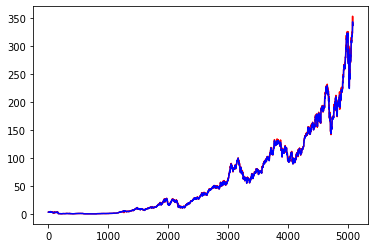

In [9]:
plt.plot(a, color='r')
plt.plot(e, color='b')

In [10]:
df2=df2.drop(df2.index[-1])
df1[['open','high','low','close']]=df2[['open','high','low','close']]

In [11]:
df1=df1.interpolate(method='akima')
df1.replace(np.inf, np.nan)
df1=df1.dropna(subset=['open', 'high', 'low', 'close'])

In [12]:
from sklearn import preprocessing
data=df1.drop(['date'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5079 entries, 0 to 5078
Data columns (total 15 columns):
open                     5079 non-null float64
close                    5079 non-null float64
low                      5079 non-null float64
high                     5079 non-null float64
volume                   5079 non-null int64
bb_bbm                   5079 non-null float64
bb_bbh                   5079 non-null float64
bb_bbl                   5079 non-null float64
atr                      5079 non-null float64
macd                     5079 non-null float64
cci                      5079 non-null float64
ema                      5079 non-null float64
sma12                    5079 non-null float64
sma5                     5079 non-null float64
stochastic_oscillator    5079 non-null float64
dtypes: float64(14), int64(1)
memory usage: 634.9 KB


In [13]:
scaler= preprocessing.MinMaxScaler()
scaled_df1=scaler.fit_transform(data)
scaled_df1=pd.DataFrame(scaled_df1)
scaled_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.009072,0.009070,0.009070,0.009072,0.0,0.008515,0.009257,0.116962,0.001709,0.645339,0.659667,0.008656,0.008675,0.008534,0.759404
1,0.009072,0.009070,0.009070,0.009072,0.0,0.008625,0.009283,0.117140,0.001657,0.645721,0.648609,0.008736,0.008732,0.008824,0.803423
2,0.008892,0.008780,0.008780,0.008892,0.0,0.008770,0.009152,0.117542,0.001605,0.646080,0.616412,0.008818,0.008744,0.009038,0.842688
3,0.008892,0.008780,0.008780,0.008892,0.0,0.008836,0.009105,0.117713,0.001584,0.645940,0.577988,0.008820,0.008731,0.009054,0.629247
4,0.009054,0.009266,0.009266,0.009054,0.0,0.008921,0.009186,0.117791,0.001590,0.646414,0.625964,0.008925,0.008783,0.009091,0.946640


In [14]:
price=scaled_df1[1]

In [15]:
values=pd.DataFrame(price.values)
dataframe=pd.concat([values.shift(1),values], axis=1)
dataframe.columns=['t-1','t+1']
corr_result=dataframe.corr()
print(corr_result)

          t-1       t+1
t-1  1.000000  0.999773
t+1  0.999773  1.000000


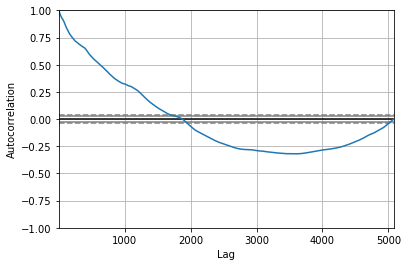

In [16]:
pd.plotting.autocorrelation_plot(price)
plt.show()

In [17]:
df4=scaled_df1.drop([1],axis=1)
df4.shape

(5079, 14)

In [18]:
#Importing the keras library to start constructing the LSTM network
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred-y_true),axis=-1))

Using TensorFlow backend.


In [19]:
import random

In [20]:
g = df4.values
r = g.shape[0]
n_train = r*4//5
train_indices = random.sample(range(r), n_train)
test_indices = [i for i in list(range(r)) if i not in train_indices]
print(len(train_indices))
print(len(test_indices))
print(type(train_indices))

4063
1016
<class 'list'>


In [21]:
g = df4.values
n_train = g.shape[0]*4//5
exp_X_train=g[train_indices,:]
exp_X_test=g[test_indices,:]
h = price.values

In [22]:
exp_y_train=h[train_indices]
exp_y_test=h[test_indices]
print(exp_X_train.shape, exp_X_test.shape)
print(exp_y_train.shape, exp_y_test.shape)

(4063, 14) (1016, 14)
(4063,) (1016,)


In [23]:
exp_y_train

array([0.02575126, 0.64030896, 0.00132176, ..., 0.55441737, 0.02918583,
       0.15462261])

In [24]:
X_train= exp_X_train.reshape((exp_X_train.shape[0],1,exp_X_train.shape[1]))
X_test=exp_X_test.reshape((exp_X_test.shape[0],1,exp_X_test.shape[1]))
y_train=exp_y_train
y_test=exp_y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4063, 1, 14) (1016, 1, 14) (4063,) (1016,)


In [25]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [26]:
neurons=60
dropout=0.20
model1 = Sequential()
model1.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*2, return_sequences=True, activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*4, return_sequences=True, activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons, activation='sigmoid'))
model1.add(Dense(units=1))
model1.add(Activation('sigmoid'))
model1.compile(loss='mse', optimizer='adam')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 60)             18000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 60)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 120)            86880     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 120)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 240)            346560    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 240)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60)               

Epoch 1/5000
4063/4063 [==============================] - 7s 2ms/step - loss: 0.0492
Epoch 2/5000
4063/4063 [==============================] - 2s 407us/step - loss: 0.0454
Epoch 3/5000
4063/4063 [==============================] - 2s 409us/step - loss: 0.0452
Epoch 4/5000
4063/4063 [==============================] - 2s 381us/step - loss: 0.0382
Epoch 5/5000
4063/4063 [==============================] - 1s 342us/step - loss: 0.0064
Epoch 6/5000
4063/4063 [==============================] - 1s 302us/step - loss: 0.0045
Epoch 7/5000
4063/4063 [==============================] - 1s 291us/step - loss: 0.0042
Epoch 8/5000
4063/4063 [==============================] - 1s 262us/step - loss: 0.0036
Epoch 9/5000
4063/4063 [==============================] - 1s 290us/step - loss: 0.0035
Epoch 10/5000
4063/4063 [==============================] - 1s 258us/step - loss: 0.0034
Epoch 11/5000
4063/4063 [==============================] - 1s 255us/step - loss: 0.0032
Epoch 12/5000
4063/4063 [==================

4063/4063 [==============================] - 2s 425us/step - loss: 5.5025e-04
Epoch 92/5000
4063/4063 [==============================] - 2s 460us/step - loss: 5.8465e-04
Epoch 93/5000
4063/4063 [==============================] - 2s 441us/step - loss: 5.3420e-04
Epoch 94/5000
4063/4063 [==============================] - 2s 395us/step - loss: 5.0287e-04
Epoch 95/5000
4063/4063 [==============================] - 2s 390us/step - loss: 5.1167e-04
Epoch 96/5000
4063/4063 [==============================] - 2s 426us/step - loss: 5.2455e-04
Epoch 97/5000
4063/4063 [==============================] - 2s 398us/step - loss: 5.0540e-04
Epoch 98/5000
4063/4063 [==============================] - 2s 394us/step - loss: 5.3190e-04
Epoch 99/5000
4063/4063 [==============================] - 2s 401us/step - loss: 5.2082e-04
Epoch 100/5000
4063/4063 [==============================] - 2s 424us/step - loss: 5.3498e-04
Epoch 101/5000
4063/4063 [==============================] - 2s 445us/step - loss: 4.8963e-04


4063/4063 [==============================] - 2s 411us/step - loss: 3.2903e-04
Epoch 180/5000
4063/4063 [==============================] - 2s 389us/step - loss: 3.3177e-04
Epoch 181/5000
4063/4063 [==============================] - 2s 403us/step - loss: 3.3557e-04
Epoch 182/5000
4063/4063 [==============================] - 2s 437us/step - loss: 3.1386e-04
Epoch 183/5000
4063/4063 [==============================] - 2s 411us/step - loss: 3.1115e-04
Epoch 184/5000
4063/4063 [==============================] - 2s 379us/step - loss: 3.1479e-04
Epoch 185/5000
4063/4063 [==============================] - 1s 367us/step - loss: 3.3064e-04
Epoch 186/5000
4063/4063 [==============================] - 2s 385us/step - loss: 3.2082e-04
Epoch 187/5000
4063/4063 [==============================] - 2s 387us/step - loss: 3.4251e-04
Epoch 188/5000
4063/4063 [==============================] - 2s 395us/step - loss: 3.2538e-04
Epoch 189/5000
4063/4063 [==============================] - 2s 414us/step - loss: 3.2

4063/4063 [==============================] - 1s 363us/step - loss: 2.5438e-04
Epoch 268/5000
4063/4063 [==============================] - 2s 398us/step - loss: 2.6083e-04
Epoch 269/5000
4063/4063 [==============================] - 2s 422us/step - loss: 2.5856e-04
Epoch 270/5000
4063/4063 [==============================] - 2s 397us/step - loss: 2.6537e-04
Epoch 271/5000
4063/4063 [==============================] - 2s 388us/step - loss: 2.4529e-04
Epoch 272/5000
4063/4063 [==============================] - 2s 371us/step - loss: 2.6733e-04
Epoch 273/5000
4063/4063 [==============================] - 2s 377us/step - loss: 2.4222e-04
Epoch 274/5000
4063/4063 [==============================] - 2s 409us/step - loss: 2.5440e-04
Epoch 275/5000
4063/4063 [==============================] - 2s 394us/step - loss: 2.6283e-04
Epoch 276/5000
4063/4063 [==============================] - 2s 416us/step - loss: 2.5582e-04
Epoch 277/5000
4063/4063 [==============================] - 2s 444us/step - loss: 2.6

Epoch 355/5000
4063/4063 [==============================] - 2s 423us/step - loss: 2.1989e-04
Epoch 356/5000
4063/4063 [==============================] - 2s 458us/step - loss: 2.2899e-04
Epoch 357/5000
4063/4063 [==============================] - 2s 394us/step - loss: 2.3753e-04
Epoch 358/5000
4063/4063 [==============================] - 2s 381us/step - loss: 2.3096e-04
Epoch 359/5000
4063/4063 [==============================] - 2s 383us/step - loss: 2.2167e-04
Epoch 360/5000
4063/4063 [==============================] - 1s 366us/step - loss: 2.2925e-04
Epoch 361/5000
4063/4063 [==============================] - 2s 371us/step - loss: 2.3497e-04
Epoch 362/5000
4063/4063 [==============================] - 1s 354us/step - loss: 2.1209e-04
Epoch 363/5000
4063/4063 [==============================] - 2s 456us/step - loss: 2.1549e-04
Epoch 364/5000
4063/4063 [==============================] - 2s 430us/step - loss: 2.3538e-04
Epoch 365/5000
4063/4063 [==============================] - 2s 451us/s

4063/4063 [==============================] - 2s 399us/step - loss: 2.0324e-04
Epoch 444/5000
4063/4063 [==============================] - 2s 370us/step - loss: 2.0321e-04
Epoch 445/5000
4063/4063 [==============================] - 2s 383us/step - loss: 1.9211e-04
Epoch 446/5000
4063/4063 [==============================] - 2s 389us/step - loss: 1.9841e-04
Epoch 447/5000
4063/4063 [==============================] - 1s 363us/step - loss: 1.9888e-04
Epoch 448/5000
4063/4063 [==============================] - 2s 377us/step - loss: 1.8574e-04
Epoch 449/5000
4063/4063 [==============================] - 2s 370us/step - loss: 1.9635e-04
Epoch 450/5000
4063/4063 [==============================] - 2s 404us/step - loss: 1.8315e-04
Epoch 451/5000
4063/4063 [==============================] - 2s 394us/step - loss: 1.9483e-04
Epoch 452/5000
4063/4063 [==============================] - 1s 360us/step - loss: 2.0021e-04
Epoch 453/5000
4063/4063 [==============================] - 1s 323us/step - loss: 2.0

4063/4063 [==============================] - 1s 326us/step - loss: 1.7050e-04
Epoch 532/5000
4063/4063 [==============================] - 1s 322us/step - loss: 1.7920e-04
Epoch 533/5000
4063/4063 [==============================] - 1s 322us/step - loss: 1.8395e-04
Epoch 534/5000
4063/4063 [==============================] - 1s 311us/step - loss: 1.6976e-04
Epoch 535/5000
4063/4063 [==============================] - 1s 323us/step - loss: 1.7260e-04
Epoch 536/5000
4063/4063 [==============================] - 1s 314us/step - loss: 1.7916e-04
Epoch 537/5000
4063/4063 [==============================] - 1s 313us/step - loss: 1.7339e-04
Epoch 538/5000
4063/4063 [==============================] - 1s 319us/step - loss: 1.7448e-04
Epoch 539/5000
4063/4063 [==============================] - 1s 334us/step - loss: 1.7595e-04
Epoch 540/5000
4063/4063 [==============================] - 1s 335us/step - loss: 1.7667e-04
Epoch 541/5000
4063/4063 [==============================] - 1s 360us/step - loss: 1.7

4063/4063 [==============================] - 1s 313us/step - loss: 1.6626e-04
Epoch 620/5000
4063/4063 [==============================] - 1s 312us/step - loss: 1.7264e-04
Epoch 621/5000
4063/4063 [==============================] - 1s 308us/step - loss: 1.6205e-04
Epoch 622/5000
4063/4063 [==============================] - 1s 307us/step - loss: 1.7104e-04
Epoch 623/5000
4063/4063 [==============================] - 1s 304us/step - loss: 1.6250e-04
Epoch 624/5000
4063/4063 [==============================] - 1s 313us/step - loss: 1.5277e-04
Epoch 625/5000
4063/4063 [==============================] - 1s 306us/step - loss: 1.6508e-04
Epoch 626/5000
4063/4063 [==============================] - 1s 310us/step - loss: 1.6726e-04
Epoch 627/5000
4063/4063 [==============================] - 1s 312us/step - loss: 1.6921e-04
Epoch 628/5000
4063/4063 [==============================] - 1s 307us/step - loss: 1.6424e-04
Epoch 629/5000
4063/4063 [==============================] - 1s 332us/step - loss: 1.5

4063/4063 [==============================] - 1s 311us/step - loss: 1.5877e-04
Epoch 708/5000
4063/4063 [==============================] - 1s 303us/step - loss: 1.4723e-04
Epoch 709/5000
4063/4063 [==============================] - 1s 326us/step - loss: 1.5090e-04
Epoch 710/5000
4063/4063 [==============================] - 1s 310us/step - loss: 1.4909e-04
Epoch 711/5000
4063/4063 [==============================] - 1s 326us/step - loss: 1.5251e-04
Epoch 712/5000
4063/4063 [==============================] - 1s 323us/step - loss: 1.5144e-04
Epoch 713/5000
4063/4063 [==============================] - 1s 335us/step - loss: 1.5596e-04
Epoch 714/5000
4063/4063 [==============================] - 1s 318us/step - loss: 1.4714e-04
Epoch 715/5000
4063/4063 [==============================] - 1s 305us/step - loss: 1.4655e-04
Epoch 716/5000
4063/4063 [==============================] - 1s 313us/step - loss: 1.4797e-04
Epoch 717/5000
4063/4063 [==============================] - 1s 318us/step - loss: 1.6

4063/4063 [==============================] - 1s 307us/step - loss: 1.4543e-04
Epoch 796/5000
4063/4063 [==============================] - 1s 306us/step - loss: 1.5031e-04
Epoch 797/5000
4063/4063 [==============================] - 1s 308us/step - loss: 1.4630e-04
Epoch 798/5000
4063/4063 [==============================] - 1s 316us/step - loss: 1.3600e-04
Epoch 799/5000
4063/4063 [==============================] - 1s 314us/step - loss: 1.4753e-04
Epoch 800/5000
4063/4063 [==============================] - 1s 323us/step - loss: 1.4813e-04
Epoch 801/5000
4063/4063 [==============================] - 1s 333us/step - loss: 1.5395e-04
Epoch 802/5000
4063/4063 [==============================] - 1s 333us/step - loss: 1.5047e-04
Epoch 803/5000
4063/4063 [==============================] - 1s 314us/step - loss: 1.4169e-04
Epoch 804/5000
4063/4063 [==============================] - 1s 310us/step - loss: 1.4638e-04
Epoch 805/5000
4063/4063 [==============================] - 1s 315us/step - loss: 1.4

4063/4063 [==============================] - 1s 293us/step - loss: 1.3285e-04
Epoch 884/5000
4063/4063 [==============================] - 1s 211us/step - loss: 1.3223e-04
Epoch 885/5000
4063/4063 [==============================] - 1s 196us/step - loss: 1.4516e-04
Epoch 886/5000
4063/4063 [==============================] - 1s 202us/step - loss: 1.3367e-04
Epoch 887/5000
4063/4063 [==============================] - 1s 197us/step - loss: 1.3811e-04
Epoch 888/5000
4063/4063 [==============================] - 1s 196us/step - loss: 1.3669e-04
Epoch 889/5000
4063/4063 [==============================] - 1s 198us/step - loss: 1.3629e-04
Epoch 890/5000
4063/4063 [==============================] - 1s 202us/step - loss: 1.3266e-04
Epoch 891/5000
4063/4063 [==============================] - 1s 198us/step - loss: 1.3522e-04
Epoch 892/5000
4063/4063 [==============================] - 1s 204us/step - loss: 1.3791e-04
Epoch 893/5000
4063/4063 [==============================] - 1s 197us/step - loss: 1.3

Epoch 971/5000
4063/4063 [==============================] - 1s 213us/step - loss: 1.1991e-04
Epoch 972/5000
4063/4063 [==============================] - 1s 182us/step - loss: 1.3011e-04
Epoch 973/5000
4063/4063 [==============================] - 1s 181us/step - loss: 1.3070e-04
Epoch 974/5000
4063/4063 [==============================] - 1s 178us/step - loss: 1.2121e-04
Epoch 975/5000
4063/4063 [==============================] - 1s 191us/step - loss: 1.4220e-04
Epoch 976/5000
4063/4063 [==============================] - 1s 180us/step - loss: 1.3176e-04
Epoch 977/5000
4063/4063 [==============================] - 1s 186us/step - loss: 1.3458e-04
Epoch 978/5000
4063/4063 [==============================] - 1s 183us/step - loss: 1.3648e-04
Epoch 979/5000
4063/4063 [==============================] - 1s 181us/step - loss: 1.3657e-04
Epoch 980/5000
4063/4063 [==============================] - 1s 179us/step - loss: 1.3168e-04
Epoch 981/5000
4063/4063 [==============================] - 1s 177us/s

4063/4063 [==============================] - 1s 184us/step - loss: 1.2508e-04
Epoch 1059/5000
4063/4063 [==============================] - 1s 187us/step - loss: 1.2366e-04
Epoch 1060/5000
4063/4063 [==============================] - 1s 184us/step - loss: 1.2506e-04
Epoch 1061/5000
4063/4063 [==============================] - 1s 183us/step - loss: 1.2174e-04
Epoch 1062/5000
4063/4063 [==============================] - 1s 182us/step - loss: 1.1813e-04
Epoch 1063/5000
4063/4063 [==============================] - 1s 180us/step - loss: 1.1155e-04
Epoch 1064/5000
4063/4063 [==============================] - 1s 180us/step - loss: 1.2748e-04
Epoch 1065/5000
4063/4063 [==============================] - 1s 180us/step - loss: 1.2412e-04
Epoch 1066/5000
4063/4063 [==============================] - 1s 180us/step - loss: 1.2077e-04
Epoch 1067/5000
4063/4063 [==============================] - 1s 179us/step - loss: 1.2353e-04
Epoch 1068/5000
4063/4063 [==============================] - 1s 181us/step -

4063/4063 [==============================] - 1s 178us/step - loss: 1.1403e-04
Epoch 1146/5000
4063/4063 [==============================] - 1s 181us/step - loss: 1.1944e-04
Epoch 1147/5000
4063/4063 [==============================] - 1s 183us/step - loss: 1.1853e-04
Epoch 1148/5000
4063/4063 [==============================] - 1s 183us/step - loss: 1.2712e-04
Epoch 1149/5000
4063/4063 [==============================] - 1s 239us/step - loss: 1.2723e-04
Epoch 1150/5000
4063/4063 [==============================] - 1s 193us/step - loss: 1.2226e-04
Epoch 1151/5000
4063/4063 [==============================] - 1s 181us/step - loss: 1.1416e-04
Epoch 1152/5000
4063/4063 [==============================] - 1s 230us/step - loss: 1.1110e-04
Epoch 1153/5000
4063/4063 [==============================] - 1s 181us/step - loss: 1.1872e-04
Epoch 1154/5000
4063/4063 [==============================] - 1s 179us/step - loss: 1.2840e-04
Epoch 1155/5000
4063/4063 [==============================] - 1s 179us/step -

4063/4063 [==============================] - 1s 186us/step - loss: 1.2159e-04
Epoch 1233/5000
4063/4063 [==============================] - 1s 188us/step - loss: 1.1559e-04
Epoch 1234/5000
4063/4063 [==============================] - 1s 186us/step - loss: 1.1493e-04
Epoch 1235/5000
4063/4063 [==============================] - 1s 182us/step - loss: 1.2072e-04
Epoch 1236/5000
4063/4063 [==============================] - 1s 228us/step - loss: 1.1438e-04
Epoch 1237/5000
4063/4063 [==============================] - 1s 224us/step - loss: 1.1259e-04
Epoch 1238/5000
4063/4063 [==============================] - 1s 233us/step - loss: 1.1043e-04
Epoch 1239/5000
4063/4063 [==============================] - 1s 240us/step - loss: 1.1655e-04
Epoch 1240/5000
4063/4063 [==============================] - 1s 188us/step - loss: 1.0908e-04
Epoch 1241/5000
4063/4063 [==============================] - 1s 191us/step - loss: 1.1048e-04
Epoch 1242/5000
4063/4063 [==============================] - 1s 188us/step -

4063/4063 [==============================] - 1s 231us/step - loss: 1.1495e-04
Epoch 1320/5000
4063/4063 [==============================] - 1s 232us/step - loss: 1.0768e-04
Epoch 1321/5000
4063/4063 [==============================] - 1s 231us/step - loss: 1.1163e-04
Epoch 1322/5000
4063/4063 [==============================] - 1s 238us/step - loss: 1.0361e-04
Epoch 1323/5000
4063/4063 [==============================] - 1s 235us/step - loss: 1.0808e-04
Epoch 1324/5000
4063/4063 [==============================] - 1s 220us/step - loss: 1.0920e-04
Epoch 1325/5000
4063/4063 [==============================] - 1s 229us/step - loss: 9.6768e-05
Epoch 1326/5000
4063/4063 [==============================] - 1s 232us/step - loss: 1.1296e-04
Epoch 1327/5000
4063/4063 [==============================] - 1s 231us/step - loss: 1.1082e-04
Epoch 1328/5000
4063/4063 [==============================] - 1s 245us/step - loss: 1.0457e-04
Epoch 1329/5000
4063/4063 [==============================] - 1s 221us/step -

4063/4063 [==============================] - 1s 180us/step - loss: 1.0819e-04
Epoch 1407/5000
4063/4063 [==============================] - 1s 183us/step - loss: 1.0449e-04
Epoch 1408/5000
4063/4063 [==============================] - 1s 183us/step - loss: 1.0645e-04
Epoch 1409/5000
4063/4063 [==============================] - 1s 182us/step - loss: 1.1072e-04
Epoch 1410/5000
4063/4063 [==============================] - 1s 183us/step - loss: 1.0491e-04
Epoch 1411/5000
4063/4063 [==============================] - 1s 181us/step - loss: 1.0439e-04
Epoch 1412/5000
4063/4063 [==============================] - 1s 183us/step - loss: 1.0452e-04
Epoch 1413/5000
4063/4063 [==============================] - 1s 184us/step - loss: 1.1266e-04
Epoch 1414/5000
4063/4063 [==============================] - 1s 187us/step - loss: 1.0557e-04
Epoch 1415/5000
4063/4063 [==============================] - 1s 192us/step - loss: 1.0659e-04
Epoch 1416/5000
4063/4063 [==============================] - 1s 228us/step -

4063/4063 [==============================] - 1s 180us/step - loss: 1.1112e-04
Epoch 1494/5000
4063/4063 [==============================] - 1s 198us/step - loss: 1.0337e-04
Epoch 1495/5000
4063/4063 [==============================] - 1s 228us/step - loss: 1.0440e-04
Epoch 1496/5000
4063/4063 [==============================] - 1s 180us/step - loss: 1.0861e-04
Epoch 1497/5000
4063/4063 [==============================] - 1s 181us/step - loss: 1.0158e-04
Epoch 1498/5000
4063/4063 [==============================] - 1s 183us/step - loss: 1.0662e-04
Epoch 1499/5000
4063/4063 [==============================] - 1s 182us/step - loss: 9.8726e-05
Epoch 1500/5000
4063/4063 [==============================] - 1s 191us/step - loss: 1.0273e-04
Epoch 1501/5000
4063/4063 [==============================] - 1s 191us/step - loss: 1.0725e-04
Epoch 1502/5000
4063/4063 [==============================] - 1s 187us/step - loss: 9.0339e-05
Epoch 1503/5000
4063/4063 [==============================] - 1s 180us/step -

4063/4063 [==============================] - 1s 188us/step - loss: 1.0509e-04
Epoch 1581/5000
4063/4063 [==============================] - 1s 186us/step - loss: 1.0885e-04
Epoch 1582/5000
4063/4063 [==============================] - 1s 185us/step - loss: 1.0221e-04
Epoch 1583/5000
4063/4063 [==============================] - 1s 184us/step - loss: 9.6258e-05
Epoch 1584/5000
4063/4063 [==============================] - 1s 183us/step - loss: 1.0624e-04
Epoch 1585/5000
4063/4063 [==============================] - 1s 182us/step - loss: 9.6860e-05
Epoch 1586/5000
4063/4063 [==============================] - 1s 191us/step - loss: 9.5936e-05
Epoch 1587/5000
4063/4063 [==============================] - 1s 183us/step - loss: 1.0028e-04
Epoch 1588/5000
4063/4063 [==============================] - 1s 186us/step - loss: 9.4123e-05
Epoch 1589/5000
4063/4063 [==============================] - 1s 183us/step - loss: 9.1818e-05
Epoch 1590/5000
4063/4063 [==============================] - 1s 187us/step -

4063/4063 [==============================] - 1s 178us/step - loss: 1.0038e-04
Epoch 1668/5000
4063/4063 [==============================] - 1s 183us/step - loss: 9.1937e-05
Epoch 1669/5000
4063/4063 [==============================] - 1s 180us/step - loss: 1.0318e-04
Epoch 1670/5000
4063/4063 [==============================] - 1s 180us/step - loss: 9.7595e-05
Epoch 1671/5000
4063/4063 [==============================] - 1s 181us/step - loss: 9.6765e-05
Epoch 1672/5000
4063/4063 [==============================] - 1s 177us/step - loss: 1.0093e-04
Epoch 1673/5000
4063/4063 [==============================] - 1s 178us/step - loss: 9.9442e-05
Epoch 1674/5000
4063/4063 [==============================] - 1s 181us/step - loss: 8.9193e-05
Epoch 1675/5000
4063/4063 [==============================] - 1s 182us/step - loss: 9.4825e-05
Epoch 1676/5000
4063/4063 [==============================] - 1s 180us/step - loss: 9.5483e-05
Epoch 1677/5000
4063/4063 [==============================] - 1s 178us/step -

Epoch 1754/5000
4063/4063 [==============================] - 1s 179us/step - loss: 9.1536e-05
Epoch 1755/5000
4063/4063 [==============================] - 1s 180us/step - loss: 9.4475e-05
Epoch 1756/5000
4063/4063 [==============================] - 1s 181us/step - loss: 1.0294e-04
Epoch 1757/5000
4063/4063 [==============================] - 1s 180us/step - loss: 9.4497e-05
Epoch 1758/5000
4063/4063 [==============================] - 1s 179us/step - loss: 1.0862e-04
Epoch 1759/5000
4063/4063 [==============================] - 1s 180us/step - loss: 9.9493e-05
Epoch 1760/5000
4063/4063 [==============================] - 1s 179us/step - loss: 9.4413e-05
Epoch 1761/5000
4063/4063 [==============================] - 1s 205us/step - loss: 9.9393e-05
Epoch 1762/5000
4063/4063 [==============================] - 1s 213us/step - loss: 9.8753e-05
Epoch 1763/5000
4063/4063 [==============================] - 1s 189us/step - loss: 8.9599e-05
Epoch 1764/5000
4063/4063 [==============================] -

4063/4063 [==============================] - 1s 185us/step - loss: 9.3253e-05
Epoch 1842/5000
4063/4063 [==============================] - 1s 248us/step - loss: 9.1768e-05
Epoch 1843/5000
4063/4063 [==============================] - 1s 194us/step - loss: 9.4772e-05
Epoch 1844/5000
4063/4063 [==============================] - 1s 179us/step - loss: 9.3855e-05
Epoch 1845/5000
4063/4063 [==============================] - 1s 206us/step - loss: 9.3105e-05
Epoch 1846/5000
4063/4063 [==============================] - 1s 179us/step - loss: 9.5681e-05
Epoch 1847/5000
4063/4063 [==============================] - 1s 177us/step - loss: 9.0134e-05
Epoch 1848/5000
4063/4063 [==============================] - 1s 180us/step - loss: 9.4863e-05
Epoch 1849/5000
4063/4063 [==============================] - 1s 230us/step - loss: 9.0062e-05
Epoch 1850/5000
4063/4063 [==============================] - 1s 237us/step - loss: 9.1473e-05
Epoch 1851/5000
4063/4063 [==============================] - 1s 232us/step -

4063/4063 [==============================] - 1s 179us/step - loss: 9.7615e-05
Epoch 1929/5000
4063/4063 [==============================] - 1s 178us/step - loss: 9.1043e-05
Epoch 1930/5000
4063/4063 [==============================] - 1s 182us/step - loss: 9.4486e-05
Epoch 1931/5000
4063/4063 [==============================] - 1s 178us/step - loss: 9.4047e-05
Epoch 1932/5000
4063/4063 [==============================] - 1s 181us/step - loss: 8.4416e-05
Epoch 1933/5000
4063/4063 [==============================] - 1s 177us/step - loss: 9.6640e-05
Epoch 1934/5000
4063/4063 [==============================] - 1s 180us/step - loss: 9.2206e-05
Epoch 1935/5000
4063/4063 [==============================] - 1s 180us/step - loss: 8.9052e-05
Epoch 1936/5000
4063/4063 [==============================] - 1s 179us/step - loss: 8.8847e-05
Epoch 1937/5000
4063/4063 [==============================] - 1s 190us/step - loss: 9.3019e-05
Epoch 1938/5000
4063/4063 [==============================] - 1s 194us/step -

4063/4063 [==============================] - 1s 181us/step - loss: 8.9658e-05
Epoch 2016/5000
4063/4063 [==============================] - 1s 180us/step - loss: 9.2058e-05
Epoch 2017/5000
4063/4063 [==============================] - 1s 186us/step - loss: 9.1120e-05
Epoch 2018/5000
4063/4063 [==============================] - 1s 207us/step - loss: 9.2745e-05
Epoch 2019/5000
4063/4063 [==============================] - 1s 223us/step - loss: 9.0457e-05
Epoch 2020/5000
4063/4063 [==============================] - 1s 230us/step - loss: 9.5545e-05
Epoch 2021/5000
4063/4063 [==============================] - 1s 224us/step - loss: 8.6861e-05
Epoch 2022/5000
4063/4063 [==============================] - 1s 227us/step - loss: 8.6619e-05
Epoch 2023/5000
4063/4063 [==============================] - 1s 202us/step - loss: 9.0087e-05
Epoch 2024/5000
4063/4063 [==============================] - 1s 197us/step - loss: 8.6090e-05
Epoch 2025/5000
4063/4063 [==============================] - 1s 231us/step -

4063/4063 [==============================] - 1s 180us/step - loss: 8.7733e-05
Epoch 2103/5000
4063/4063 [==============================] - 1s 236us/step - loss: 8.8989e-05
Epoch 2104/5000
4063/4063 [==============================] - 1s 215us/step - loss: 9.0791e-05
Epoch 2105/5000
4063/4063 [==============================] - 1s 182us/step - loss: 9.0546e-05
Epoch 2106/5000
4063/4063 [==============================] - 1s 187us/step - loss: 9.2056e-05
Epoch 2107/5000
4063/4063 [==============================] - 1s 182us/step - loss: 8.8913e-05
Epoch 2108/5000
4063/4063 [==============================] - 1s 182us/step - loss: 8.8609e-05
Epoch 2109/5000
4063/4063 [==============================] - 1s 179us/step - loss: 8.4971e-05
Epoch 2110/5000
4063/4063 [==============================] - 1s 181us/step - loss: 8.0945e-05
Epoch 2111/5000
4063/4063 [==============================] - 1s 179us/step - loss: 8.7695e-05
Epoch 2112/5000
4063/4063 [==============================] - 1s 183us/step -

4063/4063 [==============================] - 1s 187us/step - loss: 8.6057e-05
Epoch 2190/5000
4063/4063 [==============================] - 1s 189us/step - loss: 9.1965e-05
Epoch 2191/5000
4063/4063 [==============================] - 1s 184us/step - loss: 9.2087e-05
Epoch 2192/5000
4063/4063 [==============================] - 1s 184us/step - loss: 8.9703e-05
Epoch 2193/5000
4063/4063 [==============================] - 1s 182us/step - loss: 9.2737e-05
Epoch 2194/5000
4063/4063 [==============================] - 1s 181us/step - loss: 9.0650e-05
Epoch 2195/5000
4063/4063 [==============================] - 1s 181us/step - loss: 8.1730e-05
Epoch 2196/5000
4063/4063 [==============================] - 1s 182us/step - loss: 8.4045e-05
Epoch 2197/5000
4063/4063 [==============================] - 1s 181us/step - loss: 8.5369e-05
Epoch 2198/5000
4063/4063 [==============================] - 1s 184us/step - loss: 8.2775e-05
Epoch 2199/5000
4063/4063 [==============================] - 1s 184us/step -

4063/4063 [==============================] - 1s 180us/step - loss: 8.9287e-05
Epoch 2277/5000
4063/4063 [==============================] - 1s 177us/step - loss: 8.6002e-05
Epoch 2278/5000
4063/4063 [==============================] - 1s 179us/step - loss: 8.4248e-05
Epoch 2279/5000
4063/4063 [==============================] - 1s 180us/step - loss: 8.4701e-05
Epoch 2280/5000
4063/4063 [==============================] - 1s 179us/step - loss: 8.2349e-05
Epoch 2281/5000
4063/4063 [==============================] - 1s 182us/step - loss: 8.6999e-05
Epoch 2282/5000
4063/4063 [==============================] - 1s 180us/step - loss: 8.5689e-05
Epoch 2283/5000
4063/4063 [==============================] - 1s 217us/step - loss: 8.2590e-05
Epoch 2284/5000
4063/4063 [==============================] - 1s 208us/step - loss: 8.8608e-05
Epoch 2285/5000
4063/4063 [==============================] - 1s 182us/step - loss: 8.2711e-05
Epoch 2286/5000
4063/4063 [==============================] - 1s 176us/step -

4063/4063 [==============================] - 1s 180us/step - loss: 8.7529e-05
Epoch 2364/5000
4063/4063 [==============================] - 1s 178us/step - loss: 8.1613e-05
Epoch 2365/5000
4063/4063 [==============================] - 1s 180us/step - loss: 8.1763e-05
Epoch 2366/5000
4063/4063 [==============================] - 1s 178us/step - loss: 8.2119e-05
Epoch 2367/5000
4063/4063 [==============================] - 1s 180us/step - loss: 8.7055e-05
Epoch 2368/5000
4063/4063 [==============================] - 1s 182us/step - loss: 8.4470e-05
Epoch 2369/5000
4063/4063 [==============================] - 1s 179us/step - loss: 8.3677e-05
Epoch 2370/5000
4063/4063 [==============================] - 1s 178us/step - loss: 8.3630e-05
Epoch 2371/5000
4063/4063 [==============================] - 1s 179us/step - loss: 8.3603e-05
Epoch 2372/5000
4063/4063 [==============================] - 1s 177us/step - loss: 8.2536e-05
Epoch 2373/5000
4063/4063 [==============================] - 1s 193us/step -

4063/4063 [==============================] - 1s 277us/step - loss: 8.3512e-05
Epoch 2451/5000
4063/4063 [==============================] - 1s 269us/step - loss: 8.1120e-05
Epoch 2452/5000
4063/4063 [==============================] - 1s 209us/step - loss: 8.1137e-05
Epoch 2453/5000
4063/4063 [==============================] - 1s 250us/step - loss: 8.3963e-05
Epoch 2454/5000
4063/4063 [==============================] - 1s 296us/step - loss: 8.3905e-05
Epoch 2455/5000
4063/4063 [==============================] - 1s 242us/step - loss: 8.5829e-05
Epoch 2456/5000
4063/4063 [==============================] - 1s 210us/step - loss: 8.5511e-05
Epoch 2457/5000
4063/4063 [==============================] - 1s 230us/step - loss: 7.4784e-05
Epoch 2458/5000
4063/4063 [==============================] - 1s 297us/step - loss: 7.8381e-05
Epoch 2459/5000
4063/4063 [==============================] - 1s 289us/step - loss: 7.8809e-05
Epoch 2460/5000
4063/4063 [==============================] - 1s 246us/step -

4063/4063 [==============================] - 1s 257us/step - loss: 8.0171e-05
Epoch 2538/5000
4063/4063 [==============================] - 1s 265us/step - loss: 8.4045e-05
Epoch 2539/5000
4063/4063 [==============================] - 1s 293us/step - loss: 8.1686e-05
Epoch 2540/5000
4063/4063 [==============================] - 1s 271us/step - loss: 8.3560e-05
Epoch 2541/5000
4063/4063 [==============================] - 1s 227us/step - loss: 7.8465e-05
Epoch 2542/5000
4063/4063 [==============================] - 1s 220us/step - loss: 8.3420e-05
Epoch 2543/5000
4063/4063 [==============================] - 1s 246us/step - loss: 8.3303e-05
Epoch 2544/5000
4063/4063 [==============================] - 1s 234us/step - loss: 7.7968e-05
Epoch 2545/5000
4063/4063 [==============================] - 1s 233us/step - loss: 8.0176e-05
Epoch 2546/5000
4063/4063 [==============================] - 1s 201us/step - loss: 7.7970e-05
Epoch 2547/5000
4063/4063 [==============================] - 1s 244us/step -

4063/4063 [==============================] - 1s 209us/step - loss: 8.3078e-05
Epoch 2625/5000
4063/4063 [==============================] - 1s 209us/step - loss: 8.3573e-05
Epoch 2626/5000
4063/4063 [==============================] - 1s 204us/step - loss: 7.9061e-05
Epoch 2627/5000
4063/4063 [==============================] - 1s 207us/step - loss: 8.2418e-05
Epoch 2628/5000
4063/4063 [==============================] - 1s 206us/step - loss: 7.9706e-05
Epoch 2629/5000
4063/4063 [==============================] - 1s 255us/step - loss: 7.9411e-05
Epoch 2630/5000
4063/4063 [==============================] - 1s 233us/step - loss: 7.6896e-05
Epoch 2631/5000
4063/4063 [==============================] - 1s 207us/step - loss: 7.6749e-05
Epoch 2632/5000
4063/4063 [==============================] - 1s 214us/step - loss: 8.0988e-05
Epoch 2633/5000
4063/4063 [==============================] - 1s 210us/step - loss: 7.9002e-05
Epoch 2634/5000
4063/4063 [==============================] - 1s 206us/step -

4063/4063 [==============================] - 1s 268us/step - loss: 8.1858e-05
Epoch 2712/5000
4063/4063 [==============================] - 1s 225us/step - loss: 8.1828e-05
Epoch 2713/5000
4063/4063 [==============================] - 1s 211us/step - loss: 7.6840e-05
Epoch 2714/5000
4063/4063 [==============================] - 1s 208us/step - loss: 7.7071e-05
Epoch 2715/5000
4063/4063 [==============================] - 1s 214us/step - loss: 7.5224e-05
Epoch 2716/5000
4063/4063 [==============================] - 1s 211us/step - loss: 8.0637e-05
Epoch 2717/5000
4063/4063 [==============================] - 1s 209us/step - loss: 7.6176e-05
Epoch 2718/5000
4063/4063 [==============================] - 1s 229us/step - loss: 7.2778e-05
Epoch 2719/5000
4063/4063 [==============================] - 1s 267us/step - loss: 8.3021e-05
Epoch 2720/5000
4063/4063 [==============================] - 1s 214us/step - loss: 7.4920e-05
Epoch 2721/5000
4063/4063 [==============================] - 1s 212us/step -

4063/4063 [==============================] - 1s 261us/step - loss: 7.6319e-05
Epoch 2799/5000
4063/4063 [==============================] - 1s 231us/step - loss: 7.4984e-05
Epoch 2800/5000
4063/4063 [==============================] - 1s 210us/step - loss: 7.9541e-05
Epoch 2801/5000
4063/4063 [==============================] - 1s 210us/step - loss: 8.0393e-05
Epoch 2802/5000
4063/4063 [==============================] - 1s 222us/step - loss: 7.6367e-05
Epoch 2803/5000
4063/4063 [==============================] - 1s 220us/step - loss: 8.1746e-05
Epoch 2804/5000
4063/4063 [==============================] - 1s 215us/step - loss: 7.3963e-05
Epoch 2805/5000
4063/4063 [==============================] - 1s 212us/step - loss: 7.8526e-05
Epoch 2806/5000
4063/4063 [==============================] - 1s 212us/step - loss: 8.2303e-05
Epoch 2807/5000
4063/4063 [==============================] - 1s 207us/step - loss: 7.8074e-05
Epoch 2808/5000
4063/4063 [==============================] - 1s 209us/step -

4063/4063 [==============================] - 1s 215us/step - loss: 7.2110e-05
Epoch 2886/5000
4063/4063 [==============================] - 1s 263us/step - loss: 7.6679e-05
Epoch 2887/5000
4063/4063 [==============================] - 1s 209us/step - loss: 7.7507e-05
Epoch 2888/5000
4063/4063 [==============================] - 1s 211us/step - loss: 7.7306e-05
Epoch 2889/5000
4063/4063 [==============================] - 1s 212us/step - loss: 7.5932e-05
Epoch 2890/5000
4063/4063 [==============================] - 1s 215us/step - loss: 8.0950e-05
Epoch 2891/5000
4063/4063 [==============================] - 1s 208us/step - loss: 7.2627e-05
Epoch 2892/5000
4063/4063 [==============================] - 1s 215us/step - loss: 7.5992e-05
Epoch 2893/5000
4063/4063 [==============================] - 1s 207us/step - loss: 7.4282e-05
Epoch 2894/5000
4063/4063 [==============================] - 1s 211us/step - loss: 7.4487e-05
Epoch 2895/5000
4063/4063 [==============================] - 1s 209us/step -

4063/4063 [==============================] - 1s 213us/step - loss: 7.4827e-05
Epoch 2973/5000
4063/4063 [==============================] - 1s 211us/step - loss: 7.6218e-05
Epoch 2974/5000
4063/4063 [==============================] - 1s 209us/step - loss: 7.4463e-05
Epoch 2975/5000
4063/4063 [==============================] - 1s 208us/step - loss: 7.4233e-05
Epoch 2976/5000
4063/4063 [==============================] - 1s 207us/step - loss: 7.5379e-05
Epoch 2977/5000
4063/4063 [==============================] - 1s 220us/step - loss: 7.4307e-05
Epoch 2978/5000
4063/4063 [==============================] - 1s 215us/step - loss: 7.6577e-05
Epoch 2979/5000
4063/4063 [==============================] - 1s 220us/step - loss: 7.4173e-05
Epoch 2980/5000
4063/4063 [==============================] - 1s 211us/step - loss: 7.8696e-05
Epoch 2981/5000
4063/4063 [==============================] - 1s 211us/step - loss: 7.7757e-05
Epoch 2982/5000
4063/4063 [==============================] - 1s 307us/step -

4063/4063 [==============================] - 1s 311us/step - loss: 7.2546e-05 0s - loss: 7.1943e
Epoch 3060/5000
4063/4063 [==============================] - 1s 355us/step - loss: 7.7615e-05
Epoch 3061/5000
4063/4063 [==============================] - 1s 334us/step - loss: 7.4351e-05
Epoch 3062/5000
4063/4063 [==============================] - 1s 362us/step - loss: 7.5184e-05
Epoch 3063/5000
4063/4063 [==============================] - 1s 360us/step - loss: 7.5151e-05
Epoch 3064/5000
4063/4063 [==============================] - 1s 345us/step - loss: 7.4865e-05
Epoch 3065/5000
4063/4063 [==============================] - 1s 340us/step - loss: 7.7531e-05
Epoch 3066/5000
4063/4063 [==============================] - 1s 331us/step - loss: 7.9860e-05
Epoch 3067/5000
4063/4063 [==============================] - 1s 336us/step - loss: 6.9923e-05
Epoch 3068/5000
4063/4063 [==============================] - 1s 307us/step - loss: 7.4715e-05
Epoch 3069/5000
4063/4063 [==============================

4063/4063 [==============================] - 1s 184us/step - loss: 7.3512e-05
Epoch 3147/5000
4063/4063 [==============================] - 1s 183us/step - loss: 7.3916e-05
Epoch 3148/5000
4063/4063 [==============================] - 1s 183us/step - loss: 6.5755e-05
Epoch 3149/5000
4063/4063 [==============================] - 1s 187us/step - loss: 7.4474e-05
Epoch 3150/5000
4063/4063 [==============================] - 1s 182us/step - loss: 7.3936e-05
Epoch 3151/5000
4063/4063 [==============================] - 1s 276us/step - loss: 7.2828e-05
Epoch 3152/5000
4063/4063 [==============================] - 1s 186us/step - loss: 7.5105e-05
Epoch 3153/5000
4063/4063 [==============================] - 1s 185us/step - loss: 7.5361e-05
Epoch 3154/5000
4063/4063 [==============================] - 1s 183us/step - loss: 6.9713e-05
Epoch 3155/5000
4063/4063 [==============================] - 1s 194us/step - loss: 7.6707e-05
Epoch 3156/5000
4063/4063 [==============================] - 1s 180us/step -

4063/4063 [==============================] - 1s 328us/step - loss: 6.7873e-05
Epoch 3234/5000
4063/4063 [==============================] - 1s 322us/step - loss: 6.5170e-05
Epoch 3235/5000
4063/4063 [==============================] - 1s 284us/step - loss: 7.2102e-05
Epoch 3236/5000
4063/4063 [==============================] - 1s 284us/step - loss: 7.5710e-05
Epoch 3237/5000
4063/4063 [==============================] - 1s 282us/step - loss: 7.4055e-05
Epoch 3238/5000
4063/4063 [==============================] - 1s 284us/step - loss: 7.0366e-05
Epoch 3239/5000
4063/4063 [==============================] - 1s 292us/step - loss: 7.2797e-05
Epoch 3240/5000
4063/4063 [==============================] - 1s 288us/step - loss: 7.2296e-05
Epoch 3241/5000
4063/4063 [==============================] - 1s 282us/step - loss: 7.6043e-05
Epoch 3242/5000
4063/4063 [==============================] - 1s 278us/step - loss: 7.2872e-05
Epoch 3243/5000
4063/4063 [==============================] - 1s 251us/step -

4063/4063 [==============================] - 1s 335us/step - loss: 7.4140e-05
Epoch 3321/5000
4063/4063 [==============================] - 1s 335us/step - loss: 7.6084e-05
Epoch 3322/5000
4063/4063 [==============================] - 1s 335us/step - loss: 7.3837e-05
Epoch 3323/5000
4063/4063 [==============================] - 1s 334us/step - loss: 7.2521e-05
Epoch 3324/5000
4063/4063 [==============================] - 1s 330us/step - loss: 6.9056e-05
Epoch 3325/5000
4063/4063 [==============================] - 1s 334us/step - loss: 6.7574e-05
Epoch 3326/5000
4063/4063 [==============================] - 1s 338us/step - loss: 7.0623e-05
Epoch 3327/5000
4063/4063 [==============================] - 1s 337us/step - loss: 7.4751e-05
Epoch 3328/5000
4063/4063 [==============================] - 1s 343us/step - loss: 7.1477e-05
Epoch 3329/5000
4063/4063 [==============================] - 1s 342us/step - loss: 6.7518e-05
Epoch 3330/5000
4063/4063 [==============================] - 1s 345us/step -

4063/4063 [==============================] - 1s 178us/step - loss: 7.3326e-05
Epoch 3408/5000
4063/4063 [==============================] - 1s 178us/step - loss: 7.1321e-05
Epoch 3409/5000
4063/4063 [==============================] - 1s 182us/step - loss: 6.9284e-05
Epoch 3410/5000
4063/4063 [==============================] - 1s 183us/step - loss: 7.1842e-05
Epoch 3411/5000
4063/4063 [==============================] - 1s 185us/step - loss: 7.5499e-05
Epoch 3412/5000
4063/4063 [==============================] - 1s 183us/step - loss: 7.0870e-05
Epoch 3413/5000
4063/4063 [==============================] - 1s 184us/step - loss: 7.5143e-05
Epoch 3414/5000
4063/4063 [==============================] - 1s 185us/step - loss: 7.2573e-05
Epoch 3415/5000
4063/4063 [==============================] - 1s 182us/step - loss: 6.8320e-05
Epoch 3416/5000
4063/4063 [==============================] - 1s 229us/step - loss: 7.5662e-05
Epoch 3417/5000
4063/4063 [==============================] - 1s 255us/step -

4063/4063 [==============================] - 1s 287us/step - loss: 7.0184e-05
Epoch 3495/5000
4063/4063 [==============================] - 1s 304us/step - loss: 7.4800e-05
Epoch 3496/5000
4063/4063 [==============================] - 1s 303us/step - loss: 7.2258e-05
Epoch 3497/5000
4063/4063 [==============================] - 1s 295us/step - loss: 6.8978e-05
Epoch 3498/5000
4063/4063 [==============================] - 1s 283us/step - loss: 7.5444e-05
Epoch 3499/5000
4063/4063 [==============================] - 1s 278us/step - loss: 7.0630e-05
Epoch 3500/5000
4063/4063 [==============================] - 1s 275us/step - loss: 7.0345e-05
Epoch 3501/5000
4063/4063 [==============================] - 1s 318us/step - loss: 7.4657e-05
Epoch 3502/5000
4063/4063 [==============================] - 1s 319us/step - loss: 6.5361e-05
Epoch 3503/5000
4063/4063 [==============================] - 1s 280us/step - loss: 7.2070e-05
Epoch 3504/5000
4063/4063 [==============================] - 1s 282us/step -

4063/4063 [==============================] - 1s 341us/step - loss: 6.7776e-05
Epoch 3582/5000
4063/4063 [==============================] - 1s 353us/step - loss: 7.0568e-05
Epoch 3583/5000
4063/4063 [==============================] - 1s 350us/step - loss: 6.8783e-05
Epoch 3584/5000
4063/4063 [==============================] - 1s 335us/step - loss: 6.5475e-05
Epoch 3585/5000
4063/4063 [==============================] - 1s 355us/step - loss: 7.0145e-05
Epoch 3586/5000
4063/4063 [==============================] - 1s 350us/step - loss: 6.8610e-05
Epoch 3587/5000
4063/4063 [==============================] - 1s 354us/step - loss: 6.4588e-05
Epoch 3588/5000
4063/4063 [==============================] - 1s 362us/step - loss: 7.0663e-05
Epoch 3589/5000
4063/4063 [==============================] - 2s 387us/step - loss: 7.1422e-05
Epoch 3590/5000
4063/4063 [==============================] - 1s 359us/step - loss: 7.6165e-05
Epoch 3591/5000
4063/4063 [==============================] - 1s 339us/step -

4063/4063 [==============================] - 1s 191us/step - loss: 6.6264e-05
Epoch 3669/5000
4063/4063 [==============================] - 1s 182us/step - loss: 6.9245e-05
Epoch 3670/5000
4063/4063 [==============================] - 1s 182us/step - loss: 7.4483e-05
Epoch 3671/5000
4063/4063 [==============================] - 1s 180us/step - loss: 7.1226e-05
Epoch 3672/5000
4063/4063 [==============================] - 1s 181us/step - loss: 6.7251e-05
Epoch 3673/5000
4063/4063 [==============================] - 1s 199us/step - loss: 6.5017e-05
Epoch 3674/5000
4063/4063 [==============================] - 1s 215us/step - loss: 6.9246e-05
Epoch 3675/5000
4063/4063 [==============================] - 1s 220us/step - loss: 6.7579e-05
Epoch 3676/5000
4063/4063 [==============================] - 1s 182us/step - loss: 6.5540e-05
Epoch 3677/5000
4063/4063 [==============================] - 1s 183us/step - loss: 7.1258e-05
Epoch 3678/5000
4063/4063 [==============================] - 1s 231us/step -

4063/4063 [==============================] - 1s 208us/step - loss: 6.5959e-05
Epoch 3756/5000
4063/4063 [==============================] - 1s 200us/step - loss: 6.6278e-05
Epoch 3757/5000
4063/4063 [==============================] - 1s 243us/step - loss: 6.5530e-05
Epoch 3758/5000
4063/4063 [==============================] - 1s 271us/step - loss: 6.7827e-05
Epoch 3759/5000
4063/4063 [==============================] - 1s 269us/step - loss: 6.8690e-05
Epoch 3760/5000
4063/4063 [==============================] - 1s 290us/step - loss: 6.8434e-05
Epoch 3761/5000
4063/4063 [==============================] - 1s 214us/step - loss: 6.7758e-05
Epoch 3762/5000
4063/4063 [==============================] - 1s 225us/step - loss: 7.0229e-05
Epoch 3763/5000
4063/4063 [==============================] - 1s 257us/step - loss: 6.3614e-05
Epoch 3764/5000
4063/4063 [==============================] - 1s 230us/step - loss: 6.8319e-05
Epoch 3765/5000
4063/4063 [==============================] - 1s 210us/step -

4063/4063 [==============================] - 2s 449us/step - loss: 6.7054e-05
Epoch 3843/5000
4063/4063 [==============================] - 2s 426us/step - loss: 6.6536e-05
Epoch 3844/5000
4063/4063 [==============================] - 1s 369us/step - loss: 6.2335e-05
Epoch 3845/5000
4063/4063 [==============================] - 2s 448us/step - loss: 6.8981e-05
Epoch 3846/5000
4063/4063 [==============================] - 2s 436us/step - loss: 6.8744e-05
Epoch 3847/5000
4063/4063 [==============================] - 2s 406us/step - loss: 6.7545e-05
Epoch 3848/5000
4063/4063 [==============================] - 2s 402us/step - loss: 6.5205e-05
Epoch 3849/5000
4063/4063 [==============================] - 2s 376us/step - loss: 6.4576e-05
Epoch 3850/5000
4063/4063 [==============================] - 2s 407us/step - loss: 6.6222e-05
Epoch 3851/5000
4063/4063 [==============================] - 2s 450us/step - loss: 7.1926e-05
Epoch 3852/5000
4063/4063 [==============================] - 2s 452us/step -

4063/4063 [==============================] - 1s 259us/step - loss: 6.6691e-05
Epoch 3930/5000
4063/4063 [==============================] - 1s 265us/step - loss: 6.4540e-05
Epoch 3931/5000
4063/4063 [==============================] - 1s 220us/step - loss: 6.6128e-05
Epoch 3932/5000
4063/4063 [==============================] - 1s 255us/step - loss: 6.7522e-05
Epoch 3933/5000
4063/4063 [==============================] - 1s 275us/step - loss: 6.5298e-05
Epoch 3934/5000
4063/4063 [==============================] - 1s 256us/step - loss: 6.3276e-05
Epoch 3935/5000
4063/4063 [==============================] - 1s 204us/step - loss: 6.3981e-05
Epoch 3936/5000
4063/4063 [==============================] - 1s 207us/step - loss: 6.2573e-05
Epoch 3937/5000
4063/4063 [==============================] - 1s 227us/step - loss: 6.6126e-05
Epoch 3938/5000
4063/4063 [==============================] - 1s 251us/step - loss: 6.4255e-05
Epoch 3939/5000
4063/4063 [==============================] - 1s 229us/step -

4063/4063 [==============================] - 1s 190us/step - loss: 6.2139e-05
Epoch 4016/5000
4063/4063 [==============================] - 1s 190us/step - loss: 6.2579e-05
Epoch 4017/5000
4063/4063 [==============================] - 1s 300us/step - loss: 6.3352e-05
Epoch 4018/5000
4063/4063 [==============================] - 1s 277us/step - loss: 6.9460e-05
Epoch 4019/5000
4063/4063 [==============================] - 1s 280us/step - loss: 6.8642e-05
Epoch 4020/5000
4063/4063 [==============================] - 1s 304us/step - loss: 6.6766e-05
Epoch 4021/5000
4063/4063 [==============================] - 1s 225us/step - loss: 7.0461e-05
Epoch 4022/5000
4063/4063 [==============================] - 1s 228us/step - loss: 6.3755e-05
Epoch 4023/5000
4063/4063 [==============================] - 1s 244us/step - loss: 6.2478e-05
Epoch 4024/5000
4063/4063 [==============================] - 1s 284us/step - loss: 6.5075e-05
Epoch 4025/5000
4063/4063 [==============================] - 1s 271us/step -

4063/4063 [==============================] - 1s 317us/step - loss: 6.4001e-05
Epoch 4103/5000
4063/4063 [==============================] - 1s 320us/step - loss: 6.2241e-05
Epoch 4104/5000
4063/4063 [==============================] - 1s 324us/step - loss: 6.3549e-05
Epoch 4105/5000
4063/4063 [==============================] - 1s 277us/step - loss: 6.4171e-05
Epoch 4106/5000
4063/4063 [==============================] - 1s 345us/step - loss: 6.3346e-05
Epoch 4107/5000
4063/4063 [==============================] - 2s 425us/step - loss: 6.4161e-05
Epoch 4108/5000
4063/4063 [==============================] - 2s 424us/step - loss: 6.6165e-05
Epoch 4109/5000
4063/4063 [==============================] - 2s 414us/step - loss: 6.4411e-05
Epoch 4110/5000
4063/4063 [==============================] - 2s 432us/step - loss: 6.5361e-05
Epoch 4111/5000
4063/4063 [==============================] - 2s 403us/step - loss: 6.4496e-05
Epoch 4112/5000
4063/4063 [==============================] - 2s 420us/step -

4063/4063 [==============================] - 2s 481us/step - loss: 6.2806e-05
Epoch 4190/5000
4063/4063 [==============================] - 2s 452us/step - loss: 6.5595e-05
Epoch 4191/5000
4063/4063 [==============================] - 2s 474us/step - loss: 6.3167e-05
Epoch 4192/5000
4063/4063 [==============================] - 2s 479us/step - loss: 6.6523e-05
Epoch 4193/5000
4063/4063 [==============================] - 2s 487us/step - loss: 6.7724e-05
Epoch 4194/5000
4063/4063 [==============================] - 2s 465us/step - loss: 6.7705e-05
Epoch 4195/5000
4063/4063 [==============================] - 2s 444us/step - loss: 6.1472e-05
Epoch 4196/5000
4063/4063 [==============================] - 2s 457us/step - loss: 6.4801e-05
Epoch 4197/5000
4063/4063 [==============================] - 2s 421us/step - loss: 6.3460e-05
Epoch 4198/5000
4063/4063 [==============================] - 2s 439us/step - loss: 6.3971e-05
Epoch 4199/5000
4063/4063 [==============================] - 2s 440us/step -

4063/4063 [==============================] - 1s 302us/step - loss: 5.9922e-05
Epoch 4277/5000
4063/4063 [==============================] - 1s 292us/step - loss: 6.3601e-05
Epoch 4278/5000
4063/4063 [==============================] - 1s 324us/step - loss: 6.2599e-05
Epoch 4279/5000
4063/4063 [==============================] - 1s 234us/step - loss: 6.0918e-05
Epoch 4280/5000
4063/4063 [==============================] - 1s 234us/step - loss: 6.4157e-05
Epoch 4281/5000
4063/4063 [==============================] - 1s 231us/step - loss: 6.3972e-05
Epoch 4282/5000
4063/4063 [==============================] - 1s 263us/step - loss: 6.5328e-05
Epoch 4283/5000
4063/4063 [==============================] - 1s 312us/step - loss: 6.2458e-05
Epoch 4284/5000
4063/4063 [==============================] - 1s 234us/step - loss: 6.5288e-05
Epoch 4285/5000
4063/4063 [==============================] - 1s 279us/step - loss: 6.6312e-05
Epoch 4286/5000
4063/4063 [==============================] - 1s 348us/step -

4063/4063 [==============================] - 1s 275us/step - loss: 6.2567e-05
Epoch 4364/5000
4063/4063 [==============================] - 1s 202us/step - loss: 6.3512e-05
Epoch 4365/5000
4063/4063 [==============================] - 1s 197us/step - loss: 6.0575e-05
Epoch 4366/5000
4063/4063 [==============================] - 1s 214us/step - loss: 6.3285e-05
Epoch 4367/5000
4063/4063 [==============================] - 1s 228us/step - loss: 6.5941e-05
Epoch 4368/5000
4063/4063 [==============================] - 1s 227us/step - loss: 6.3831e-05
Epoch 4369/5000
4063/4063 [==============================] - 1s 279us/step - loss: 6.7622e-05
Epoch 4370/5000
4063/4063 [==============================] - 1s 302us/step - loss: 6.3413e-05
Epoch 4371/5000
4063/4063 [==============================] - 1s 221us/step - loss: 6.3283e-05
Epoch 4372/5000
4063/4063 [==============================] - 1s 239us/step - loss: 6.1258e-05
Epoch 4373/5000
4063/4063 [==============================] - 1s 311us/step -

4063/4063 [==============================] - 1s 245us/step - loss: 6.3217e-05
Epoch 4451/5000
4063/4063 [==============================] - 1s 253us/step - loss: 6.2888e-05
Epoch 4452/5000
4063/4063 [==============================] - 1s 260us/step - loss: 6.0981e-05
Epoch 4453/5000
4063/4063 [==============================] - 1s 287us/step - loss: 5.8048e-05
Epoch 4454/5000
4063/4063 [==============================] - 1s 276us/step - loss: 6.0955e-05
Epoch 4455/5000
4063/4063 [==============================] - 1s 236us/step - loss: 6.4779e-05
Epoch 4456/5000
4063/4063 [==============================] - 1s 237us/step - loss: 6.1207e-05
Epoch 4457/5000
4063/4063 [==============================] - 1s 244us/step - loss: 6.8236e-05
Epoch 4458/5000
4063/4063 [==============================] - 1s 265us/step - loss: 6.4412e-05
Epoch 4459/5000
4063/4063 [==============================] - 1s 252us/step - loss: 6.1503e-05
Epoch 4460/5000
4063/4063 [==============================] - 1s 255us/step -

Epoch 4537/5000
4063/4063 [==============================] - 2s 401us/step - loss: 6.2985e-05
Epoch 4538/5000
4063/4063 [==============================] - 1s 286us/step - loss: 6.3852e-05
Epoch 4539/5000
4063/4063 [==============================] - 1s 250us/step - loss: 6.0471e-05
Epoch 4540/5000
4063/4063 [==============================] - 1s 268us/step - loss: 6.2641e-05
Epoch 4541/5000
4063/4063 [==============================] - 1s 240us/step - loss: 6.2903e-05
Epoch 4542/5000
4063/4063 [==============================] - 1s 239us/step - loss: 5.7175e-05
Epoch 4543/5000
4063/4063 [==============================] - 1s 245us/step - loss: 5.9778e-05
Epoch 4544/5000
4063/4063 [==============================] - 1s 228us/step - loss: 6.4970e-05
Epoch 4545/5000
4063/4063 [==============================] - 1s 231us/step - loss: 6.0106e-05
Epoch 4546/5000
4063/4063 [==============================] - 1s 253us/step - loss: 6.0936e-05
Epoch 4547/5000
4063/4063 [==============================] -

4063/4063 [==============================] - 1s 240us/step - loss: 6.1886e-05
Epoch 4625/5000
4063/4063 [==============================] - 1s 246us/step - loss: 6.1560e-05
Epoch 4626/5000
4063/4063 [==============================] - 1s 246us/step - loss: 5.9158e-05
Epoch 4627/5000
4063/4063 [==============================] - 1s 247us/step - loss: 5.9658e-05
Epoch 4628/5000
4063/4063 [==============================] - 1s 324us/step - loss: 5.9865e-05
Epoch 4629/5000
4063/4063 [==============================] - 1s 352us/step - loss: 6.1351e-05
Epoch 4630/5000
4063/4063 [==============================] - 1s 366us/step - loss: 6.2116e-05
Epoch 4631/5000
4063/4063 [==============================] - 2s 383us/step - loss: 6.4110e-05
Epoch 4632/5000
4063/4063 [==============================] - 1s 333us/step - loss: 6.0964e-05
Epoch 4633/5000
4063/4063 [==============================] - 1s 258us/step - loss: 6.6228e-05
Epoch 4634/5000
4063/4063 [==============================] - 1s 249us/step -

4063/4063 [==============================] - 1s 312us/step - loss: 6.3774e-05
Epoch 4712/5000
4063/4063 [==============================] - 1s 332us/step - loss: 6.0705e-05
Epoch 4713/5000
4063/4063 [==============================] - 1s 254us/step - loss: 5.9388e-05
Epoch 4714/5000
4063/4063 [==============================] - 1s 289us/step - loss: 5.9776e-05
Epoch 4715/5000
4063/4063 [==============================] - 1s 338us/step - loss: 6.3786e-05
Epoch 4716/5000
4063/4063 [==============================] - 1s 336us/step - loss: 6.2148e-05
Epoch 4717/5000
4063/4063 [==============================] - 2s 377us/step - loss: 6.6060e-05
Epoch 4718/5000
4063/4063 [==============================] - 1s 316us/step - loss: 6.1056e-05
Epoch 4719/5000
4063/4063 [==============================] - 2s 373us/step - loss: 5.8083e-05
Epoch 4720/5000
4063/4063 [==============================] - 2s 463us/step - loss: 6.2187e-05
Epoch 4721/5000
4063/4063 [==============================] - 2s 459us/step -

4063/4063 [==============================] - 2s 385us/step - loss: 5.7193e-05
Epoch 4799/5000
4063/4063 [==============================] - 2s 387us/step - loss: 6.1049e-05
Epoch 4800/5000
4063/4063 [==============================] - 2s 380us/step - loss: 5.7250e-05
Epoch 4801/5000
4063/4063 [==============================] - 2s 384us/step - loss: 6.2531e-05
Epoch 4802/5000
4063/4063 [==============================] - 2s 414us/step - loss: 5.9707e-05
Epoch 4803/5000
4063/4063 [==============================] - 2s 377us/step - loss: 6.4619e-05
Epoch 4804/5000
4063/4063 [==============================] - 2s 453us/step - loss: 6.1580e-05
Epoch 4805/5000
4063/4063 [==============================] - 2s 441us/step - loss: 5.9422e-05
Epoch 4806/5000
4063/4063 [==============================] - 2s 467us/step - loss: 6.1024e-05
Epoch 4807/5000
4063/4063 [==============================] - 2s 459us/step - loss: 6.2124e-05
Epoch 4808/5000
4063/4063 [==============================] - 2s 423us/step -

4063/4063 [==============================] - 1s 262us/step - loss: 5.8417e-05
Epoch 4885/5000
4063/4063 [==============================] - 1s 292us/step - loss: 6.2351e-05
Epoch 4886/5000
4063/4063 [==============================] - 1s 290us/step - loss: 6.1297e-05
Epoch 4887/5000
4063/4063 [==============================] - 1s 304us/step - loss: 6.3908e-05
Epoch 4888/5000
4063/4063 [==============================] - 1s 308us/step - loss: 5.8949e-05
Epoch 4889/5000
4063/4063 [==============================] - 1s 274us/step - loss: 6.6974e-05
Epoch 4890/5000
4063/4063 [==============================] - 1s 260us/step - loss: 6.0470e-05
Epoch 4891/5000
4063/4063 [==============================] - 1s 266us/step - loss: 6.0745e-05
Epoch 4892/5000
4063/4063 [==============================] - 1s 295us/step - loss: 5.6773e-05
Epoch 4893/5000
4063/4063 [==============================] - 1s 275us/step - loss: 6.4975e-05
Epoch 4894/5000
4063/4063 [==============================] - 1s 341us/step -

4063/4063 [==============================] - 1s 262us/step - loss: 6.1417e-05
Epoch 4972/5000
4063/4063 [==============================] - 1s 270us/step - loss: 5.6523e-05
Epoch 4973/5000
4063/4063 [==============================] - 1s 274us/step - loss: 5.9445e-05
Epoch 4974/5000
4063/4063 [==============================] - 1s 296us/step - loss: 6.1989e-05
Epoch 4975/5000
4063/4063 [==============================] - 1s 287us/step - loss: 6.1920e-05
Epoch 4976/5000
4063/4063 [==============================] - 1s 283us/step - loss: 6.2251e-05
Epoch 4977/5000
4063/4063 [==============================] - 1s 278us/step - loss: 5.6308e-05
Epoch 4978/5000
4063/4063 [==============================] - 1s 270us/step - loss: 5.6952e-05
Epoch 4979/5000
4063/4063 [==============================] - 1s 283us/step - loss: 5.6169e-05
Epoch 4980/5000
4063/4063 [==============================] - 1s 274us/step - loss: 5.9996e-05
Epoch 4981/5000
4063/4063 [==============================] - 1s 308us/step -

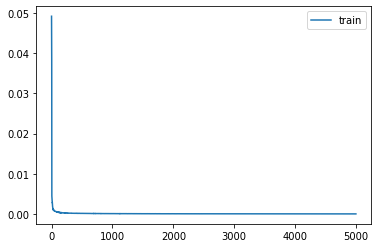

In [27]:
history=model1.fit(X_train,y_train, epochs=5000, shuffle=False,batch_size=64, verbose=1)
model1.save('./models/attemptA.h5')
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['rmse'], label='test')
plt.legend()
plt.show()

In [33]:
pred=model1.predict(X_test)
actual= pd.DataFrame(y_test)

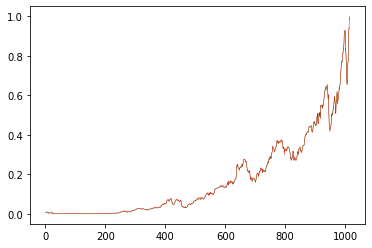

In [34]:
plt.plot(pred, color='green',linewidth=0.4)
plt.plot(actual, color='red', linewidth=0.4)
plt.savefig('./sae_prediction.png')
plt.show()

In [35]:
def mean_absolute_percentage_error(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return(mape)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
import math
mse = mean_squared_error(actual, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(actual, pred)
mape = mean_absolute_percentage_error(actual, pred)
print("mse, rmse, mae, mape:" + str((mse,rmse,mae,mape)))

mse, rmse, mae, mape:(1.4071473737603665e-05, 0.003751196307526929, 0.002413713774479691, 0    30.989317
dtype: float64)
